In [34]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import io

# Embedded CSV data as a string (replace with actual file path if needed)
csv_data_path = r'/Users/pankajti/dev/git/fedreserve_data_research/frdr/analysis/processed_events.csv'
# Load data into a pandas DataFrame
df = pd.read_csv(csv_data_path)



In [38]:
df.head()

,DATE,Yield,FedFundsRate,inflation,employment,other,AY,CAY
0,2018-02-13,2.83,1.42,0.143,0.143,0.714,NaN,0.068125
1,2018-02-22,2.92,1.42,0.083,0.333,0.583,NaN,-0.049756
2,2018-02-26,2.86,1.42,0.273,0.273,0.455,NaN,0.021778
3,2018-02-26,2.86,1.42,0.273,0.273,0.455,NaN,0.021778
4,2018-02-26,2.86,1.42,0.000,0.077,0.923,NaN,0.021778


In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = df[["inflation", "employment", "other", "FedFundsRate"]]  # your feature matrix
X = sm.add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


       Variable           VIF
0         const  5.825034e+06
1     inflation  1.856032e+05
2    employment  1.671718e+05
3         other  3.255887e+05
4  FedFundsRate  1.014274e+00


In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = df[["inflation", "employment", "FedFundsRate"]]  # your feature matrix
X = sm.add_constant(X)

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Variable       VIF
0         const  6.297577
1     inflation  1.013531
2    employment  1.010656
3  FedFundsRate  1.013121


In [7]:
df.shape

(495, 14)

In [10]:
df.head()

,DATE,Yield,FedFundsRate,chair,speaker,emphasis,title,inflation,employment,other,year,rateDifference,shortSpeaker,dominantTopic
0,2018-02-13,2.83,1.42,Jerome Powell,Chairman Jerome H. Powell,"{'inflation': 0.143, 'employment': 0.143, 'oth...",Remarks at the Ceremonial Swearing-in,0.143,0.143,0.714,2018,1.41,Jerome H. Powell,Other
1,2018-02-22,2.92,1.42,Jerome Powell,Vice Chairman for Supervision Randal K. Quarles,"{'inflation': 0.083, 'employment': 0.333, 'oth...",The U.S. Economy after the Global Financial Cr...,0.083,0.333,0.583,2018,1.50,Randal K. Quarles,Other
2,2018-02-26,2.86,1.42,Jerome Powell,Vice Chairman for Supervision Randal K. Quarles,"{'inflation': 0.273, 'employment': 0.273, 'oth...",An Assessment of the U.S. Economy,0.273,0.273,0.455,2018,1.44,Randal K. Quarles,Other
3,2018-02-26,2.86,1.42,Jerome Powell,Vice Chairman for Supervision Randal K. Quarles,"{'inflation': 0.0, 'employment': 0.077, 'other...",Brief Thoughts on the Financial Regulatory Sys...,0.000,0.077,0.923,2018,1.44,Randal K. Quarles,Other
4,2018-03-05,2.88,1.42,Jerome Powell,Vice Chairman for Supervision Randal K. Quarles,"{'inflation': 0.0, 'employment': 0.0, 'other':...",The Federal Reserve’s Regulatory Agenda for Fo...,0.000,0.000,1.000,2018,1.46,Randal K. Quarles,Other


In [11]:
from plotly import express as px

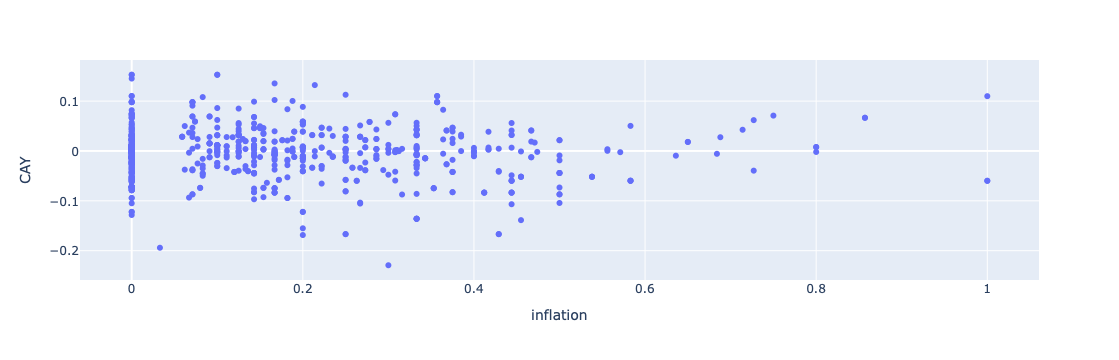

In [39]:
fig = px.scatter(df, x="inflation", y="CAY")
fig.show()

In [46]:
import plotly.express as px

# Scatter plot of CAY vs inflation
fig1 = px.scatter(df, x='inflation', y='CAY', title='CAY vs Inflation',
                  labels={'inflation': 'Inflation', 'CAY': 'CAY'}) # Create a scatter plot using the `CAY` and `inflation` columns. Map `inflation` to the x-axis and label it as "Inflation". Map `CAY` to the y-axis and label it as "CAY". Set the title of the plot to "CAY vs Inflation".
fig1.update_traces(marker=dict(size=5))
fig1.write_image("cay_vs_inflation_scatterplot.png")

# Scatter plot of CAY vs employment
fig2 = px.scatter(df, x='employment', y='CAY', title='CAY vs Employment',
                  labels={'employment': 'Employment', 'CAY': 'CAY'}) # Create another scatter plot using the `CAY` and `employment` columns. Map `employment` to the x-axis and label it as "Employment". Map `CAY` to the y-axis and label it as "CAY". Set the title of this plot to "CAY vs Employment".
fig2.update_traces(marker=dict(size=5))
fig2.write_image("cay_vs_employment_scatterplot.png")

In [17]:
import numpy as np 
df['log_yield'] = np.log(df.Yield)

In [41]:
df = df.set_index('DATE')

<Axes: >

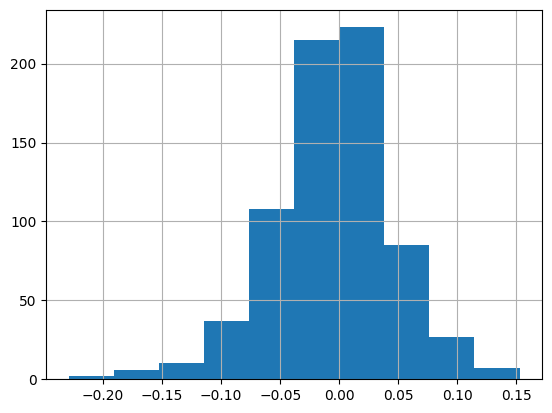

In [43]:
df.CAY.hist()

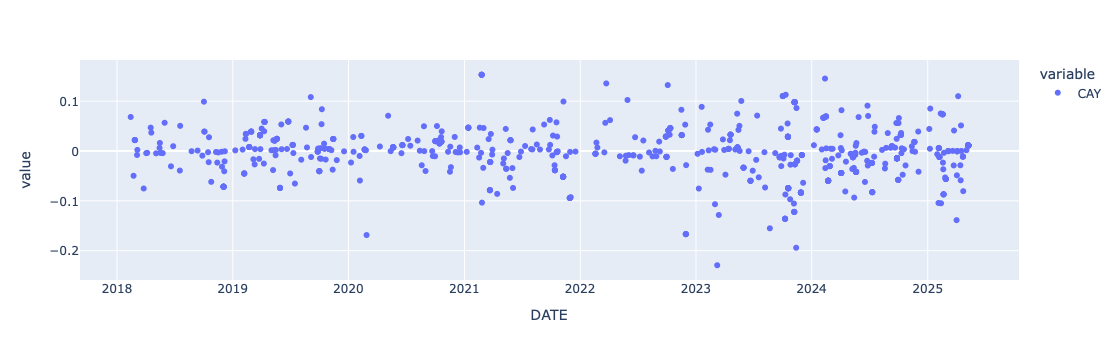

In [42]:
fig = px.scatter(df,  y=['CAY'])
fig.show()

In [30]:
df

,Yield,FedFundsRate,chair,speaker,emphasis,title,inflation,employment,other,year,rateDifference,shortSpeaker,dominantTopic,log_yield
DATE,,,,,,,,,,,,,,
2018-02-13,2.83,1.42,Jerome Powell,Chairman Jerome H. Powell,"{'inflation': 0.143, 'employment': 0.143, 'oth...",Remarks at the Ceremonial Swearing-in,0.143,0.143,0.714,2018,1.41,Jerome H. Powell,Other,1.040277
2018-02-22,2.92,1.42,Jerome Powell,Vice Chairman for Supervision Randal K. Quarles,"{'inflation': 0.083, 'employment': 0.333, 'oth...",The U.S. Economy after the Global Financial Cr...,0.083,0.333,0.583,2018,1.50,Randal K. Quarles,Other,1.071584
2018-02-26,2.86,1.42,Jerome Powell,Vice Chairman for Supervision Randal K. Quarles,"{'inflation': 0.273, 'employment': 0.273, 'oth...",An Assessment of the U.S. Economy,0.273,0.273,0.455,2018,1.44,Randal K. Quarles,Other,1.050822
2018-02-26,2.86,1.42,Jerome Powell,Vice Chairman for Supervision Randal K. Quarles,"{'inflation': 0.0, 'employment': 0.077, 'other...",Brief Thoughts on the Financial Regulatory Sys...,0.000,0.077,0.923,2018,1.44,Randal K. Quarles,Other,1.050822
2018-03-05,2.88,1.42,Jerome Powell,Vice Chairman for Supervision Randal K. Quarles,"{'inflation': 0.0, 'employment': 0.0, 'other':...",The Federal Reserve’s Regulatory Agenda for Fo...,0.000,0.000,1.000,2018,1.46,Randal K. Quarles,Other,1.057790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-05-03,4.33,4.33,Jerome Powell,Governor Lisa D. Cook,"{'inflation': 0.0, 'employment': 0.333, 'other...",Four Guides for the Journey Ahead,0.000,0.333,0.667,2025,0.00,Lisa D. Cook,Other,1.465568
2025-05-09,4.37,4.33,Jerome Powell,Governor Adriana D. Kugler,"{'inflation': 0.1, 'employment': 0.5, 'other':...",Assessing Maximum Employment,0.100,0.500,0.400,2025,0.04,Adriana D. Kugler,Employment,1.474763
2025-05-09,4.37,4.33,Jerome Powell,Governor Christopher J. Waller,"{'inflation': 0.143, 'employment': 0.238, 'oth...","Thank You, John",0.143,0.238,0.619,2025,0.04,Christopher J. Waller,Other,1.474763
